# LOADING THE DATASET

In [1]:
file=("Churn_Modelling.csv")

In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv(file)

In [4]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

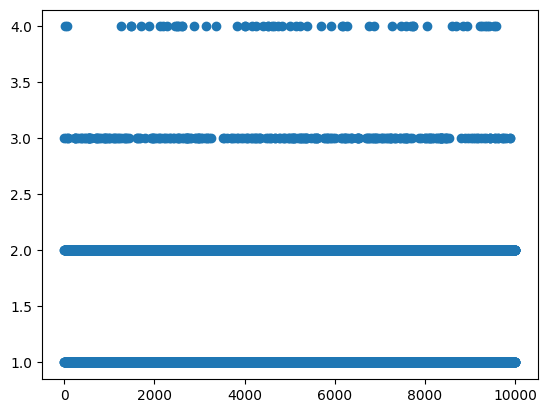

In [7]:
plt.scatter(dataset.index,dataset['NumOfProducts'])

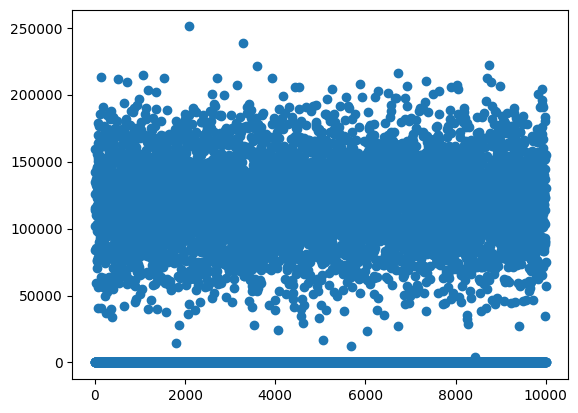

In [8]:
plt.scatter(dataset.index,dataset['Balance'])

Text(0, 0.5, 'IsActiveMember')

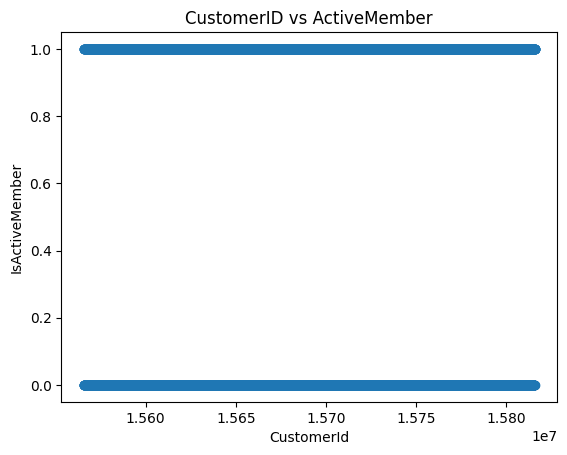

In [9]:
plt.scatter(dataset.CustomerId,dataset.IsActiveMember)
plt.title("CustomerID vs ActiveMember")
plt.xlabel("CustomerId")
plt.ylabel("IsActiveMember")

Text(0, 0.5, 'EstimatedSalary')

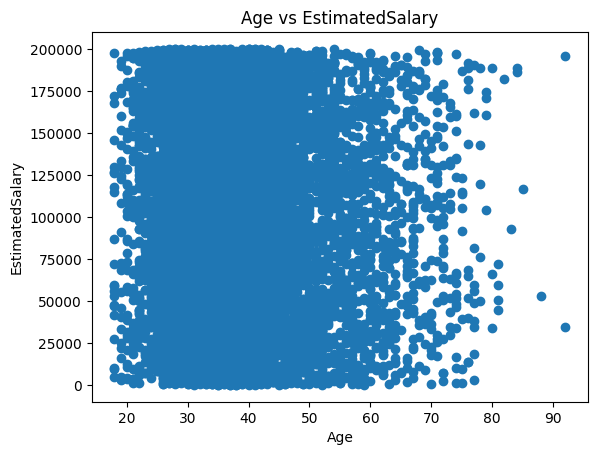

In [10]:
plt.scatter(dataset.Age,dataset.EstimatedSalary)
plt.title("Age vs EstimatedSalary")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")

# PERFORMING DESCRIPTIVE ANALYSIS ON THE DATASET

In [11]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# HANDLING THE MISSING VALUES

In [13]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
dataset[dataset.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# FIND THE OUTLIERS AND REPLACE IT

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts'>

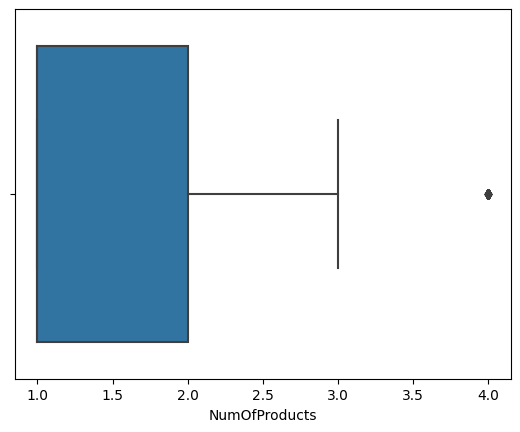

In [15]:
sns.boxplot(dataset['NumOfProducts'],data=dataset)

In [16]:
Q1=dataset['NumOfProducts'].quantile(0.25)
Q3=dataset['NumOfProducts'].quantile(0.75)
IQR=Q3-Q1
IQR

1.0

In [17]:
P_mean = dataset['NumOfProducts'].mean()
p_std = dataset['NumOfProducts'].std()
low= P_mean -(3 * p_std)
high= P_mean + (3 * p_std)
p_outliers = dataset[(dataset['NumOfProducts'] < low) | (dataset['NumOfProducts'] > high)]
p_outliers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,71,15703793,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,1255,15610383,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,1470,15670374,Wright,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,1489,15625824,Kornilova,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1


# Label encoding

In [18]:
dataset["Gender"] = dataset["Gender"].astype('category')
dataset.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [19]:
dataset["gender_cat"] = dataset["Gender"].cat.codes
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


# Split the data into dependent and independent variables.

In [20]:
X = dataset.iloc[:, :-1].values
X

array([[1, 15634602, 'Hargrave', ..., 1, 101348.88, 1],
       [2, 15647311, 'Hill', ..., 1, 112542.58, 0],
       [3, 15619304, 'Onio', ..., 0, 113931.57, 1],
       ...,
       [9998, 15584532, 'Liu', ..., 1, 42085.58, 1],
       [9999, 15682355, 'Sabbatini', ..., 0, 92888.52, 1],
       [10000, 15628319, 'Walker', ..., 0, 38190.78, 0]], dtype=object)

In [21]:
Y = dataset.iloc[:, -2].values
Y

array([1, 0, 1, ..., 1, 1, 0])

# Scale the independent variables

In [22]:
from sklearn import preprocessing

In [23]:
x=dataset.iloc[:,12:14]
x

,EstimatedSalary,Exited
0,101348.88,1
1,112542.58,0
2,113931.57,1
3,93826.63,0
4,79084.10,0
...,...,...
9995,96270.64,0
9996,101699.77,0
9997,42085.58,1
9998,92888.52,1


In [24]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
new_x= min_max_scaler.fit_transform(x) 
new_x

array([[0.50673489, 1.        ],
       [0.56270874, 0.        ],
       [0.56965435, 1.        ],
       ...,
       [0.21039009, 1.        ],
       [0.46442905, 1.        ],
       [0.19091423, 0.        ]])

# Split the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [27]:
dataset.shape

(10000, 15)

In [28]:
X_train.shape

(6700, 14)

In [29]:
X_test.shape

(3300, 14)